# HDF5

HDF5 is a data model, library, and file format for storing and managing data. It supports an unlimited variety of datatypes, and is designed for flexible and efficient I/O and for high volume and complex data. HDF5 is portable and is extensible, allowing applications to evolve in their use of HDF5. The HDF5 Technology suite includes tools and applications for managing, manipulating, viewing, and analyzing data in the HDF5 format.

The [h5py](https://www.h5py.org/) package is a Pythonic interface to the HDF5 binary data format. It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. h5py uses straightforward NumPy and Python metaphors, like dictionary and NumPy array syntax. For example, you can iterate over datasets in a file, or check out the .shape or .dtype attributes of datasets.

`conda install -c conda-forge h5py`

To get familiar with h5py, go through the [tutorial](https://docs.h5py.org/en/latest/quick.html) and reproduce the examples here. Then answer the following questions:

- In SQL databases you have worked with the following entities: database, table, SQLite Studio. Which of the HDF5 entities you have seen (h5py, File and Dataset) do you think are the HDF5 equivalent of the entities in SQL?

- Use the `h5dump` command to visualize the following data from the `mytestfile.hdf5` you have created in the tutorial.

  - Which flag of h5dump can be used to visualize only the `header` of the file?
  - Which flag of h5dump can be used to visualize a specific dataset?

In [1]:
import h5py

Hacer el tutorial: reproducir las ejecuciones que sales de https://docs.h5py.org/en/latest/quick.html

# NumPy and h5py

## NumPy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

NumPy is licensed under the BSD license, enabling reuse with few restrictions.

##  h5py

HDF5 lets you store huge amounts of numerical data in persistent storage and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

# Performance review

## Python lists

We can try to emulate multidimensional arrays using nested lists. Why is this a bad idea? **Read [this](https://docs.python.org/3.7/faq/design.html#how-are-lists-implemented-in-cpython)**.

In [2]:
l0 = [100, 200, 50, 400]
l1 = [50, 0, 0, 100]
l2 = [350, 100, 50, 200]
ls = [l0, l1, l2]
print(ls)

[[100, 200, 50, 400], [50, 0, 0, 100], [350, 100, 50, 200]]


In [3]:
L = range(1000)
%timeit [i**2 for i in L]

630 µs ± 43.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Now with NumPy

NumPy arrays are stored contiguously in memory. Also, specific routines implemented in the C language provide a perfomance boost.

In [4]:
import numpy as np
a = np.array(ls)
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [5]:
t = np.arange(1000)
%timeit a**2

2.18 µs ± 283 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# NumPy

The basic NumPy type is the **ndarray** object.

In [6]:
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [7]:
type(a)

numpy.ndarray

In [12]:
print(np.array(((1,2,3), (4,5,6)))) # np.array accepts SEQUENCES (Todo aquello que se puede iterar)

[[1 2 3]
 [4 5 6]]


In [9]:
print(a*10)

[[1000 2000  500 4000]
 [ 500    0    0 1000]
 [3500 1000  500 2000]]


In [10]:
print(a+a)

[[200 400 100 800]
 [100   0   0 200]
 [700 200 100 400]]


In [11]:
b = a.copy()
b[0] = 42 # broadcasting
print(b)

[[ 42  42  42  42]
 [ 50   0   0 100]
 [350 100  50 200]]


## Inside a numpy ndarray

[NumPy flags](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flags.html)

Los `strides`son una tupla cuyos elementos indican:
* El número de bites que hay que pasar para saltar de la primera fila a la segunda, etc... Es decir, el número de elementos de cada fila multiplicado por lo que ocupa cada elemento en bytes
* El número de bytes que hay en cada elemento del array

In [13]:
a = np.array([[100, 200, 50, 400], [50, 0, 0, 100], [350, 100, 50, 200]])

def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides) # strides are measured in bytes
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [14]:
b = a.astype(np.uint8) # astype() always creates a copy of the data
print_info(b)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: uint8
strides: (4, 1)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [15]:
abytes = a.ravel().view(dtype=np.uint8) 
# ravel() saca el array visto en una sola dimensión
# view() does not create a new copy of the data

In [16]:
print_info(abytes)

number of elements: 96
number of dimensions: 1
shape: (96,)
data type: uint8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



* En las copias, al modificar los valores de la copia no cambian los del array original
* En las vistas, al modificar los valores de la vista SÍ que cambian los valores del array original

In [17]:
abytes

array([100,   0,   0,   0,   0,   0,   0,   0, 200,   0,   0,   0,   0,
         0,   0,   0,  50,   0,   0,   0,   0,   0,   0,   0, 144,   1,
         0,   0,   0,   0,   0,   0,  50,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,  94,
         1,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,
         0,   0,  50,   0,   0,   0,   0,   0,   0,   0, 200,   0,   0,
         0,   0,   0,   0,   0], dtype=uint8)

In [18]:
a

array([[100, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [20]:
# Modify values of 'abytes' and see what happens in 'a'
abytes[1] = 1
a

array([[356, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

### Example: take the transpose of `a`

In [21]:
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [22]:
print_info(a.T) # not a copy, same data bytes, not possible with python nested lists

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



### Example: slicing

In [23]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [24]:
print_info(a.T[::2]) # skip rows calculating on strides

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int64
strides: (16, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [25]:
print_info(a.T[::2, ::2]) # skip rows and columns calculating on strides

number of elements: 4
number of dimensions: 2
shape: (2, 2)
data type: int64
strides: (16, 64)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



### Example: getting a copy

In [ ]:
b = a

In [ ]:
print(b)

In [ ]:
a[0, 0] = 5
print(b)
a[0, 0] = 100

In [ ]:
c = a.copy()

In [ ]:
a[0, 0] = 5
print(c)
a[0, 0] = 100

### Example: axis-wise evaluation

In [ ]:
a.mean(axis=0)

In [ ]:
a.sum(axis=1)

## Structured types

Structured arrays are ndarrays whose datatype is a composition of simpler datatypes organized as a sequence of named fields.

In [26]:
dtype = np.dtype([('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])
x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)], dtype=dtype)
x

array([('Rex', 9, 81.), ('Fido', 3, 27.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

x is a one-dimensional array of length two whose datatype is a structure with three fields:
1. A string of length 10 or less named ‘name’
2. a 32-bit integer named ‘age’
3. a 32-bit float named ‘weight’.

In [27]:
x[0] # indexing by position

('Rex', 9, 81.)

In [28]:
x['age'] # indexing by field name

array([9, 3], dtype=int32)

In [29]:
print_info(x)

number of elements: 2
number of dimensions: 1
shape: (2,)
data type: [('name', '<U10'), ('age', '<i4'), ('weight', '<f4')]
strides: (48,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



More info on structured types [here](https://numpy.org/doc/stable/user/basics.rec.html).

## h5py

In [1]:
import os
import h5py
import numpy as np

In [31]:
shape = (1000, 1000)
size  = (1_000_000, 1000)
iters = size[0] // shape[0]

arr = np.random.random(shape)

with h5py.File("test.h5", "w") as f:
    dset = f.create_dataset("huge", size, dtype="f8")
    for i in range(iters):
        start = i*shape[0]
        stop  = (i+1)*shape[0]
        dset[start:stop, :] = arr

print(os.stat("test.h5").st_size // (10**9)) # 8 gigabytes

8


In [32]:
shape = (1000, 1000)
size  = (1_000_000, 1000)
iters = size[0] // shape[0]

# compute means along axis 1
means = np.empty((1_000_000,))

with h5py.File("test.h5", "r") as f:
    for i in range(iters):
        start = i*shape[0]
        stop  = (i+1)*shape[0]
        means[start:stop] = np.mean(f["huge"][start:stop, :], axis=1)
        
print(means[:10])
print(means[-1000:-990])

[0.50137871 0.50292039 0.49164052 0.50262346 0.4963385  0.50903231
 0.48499846 0.48390001 0.48633305 0.51449687]
[0.50137871 0.50292039 0.49164052 0.50262346 0.4963385  0.50903231
 0.48499846 0.48390001 0.48633305 0.51449687]


# Exercises

## Basics

Generate the following array (hint: see `np.diag`):

```
[[0., 0., 0., 0., 0.],
 [2., 0., 0., 0., 0.],
 [0., 3., 0., 0., 0.],
 [0., 0., 4., 0., 0.],
 [0., 0., 0., 5., 0.],
 [0., 0., 0., 0., 6.]]
```

In [2]:
import numpy as np

In [4]:
a = np.diag(np.arange(2,7, dtype = float), k = -1) #Hacemos el arange hasta el 7 porque no incluye el último número 
a = np.delete(a, 5, 1)
a

array([[0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 6.]])

Generate the following array (hint: see `np.tile`):

```
[[4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1],
 [4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1]]
 ```

In [80]:
a = np.array([[4,3], [2,1]])
m = np.tile(a, (2,3))
m

array([[4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1],
       [4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1]])

Generate the following array (use broadcasting):

```
[[ 0,  1,  2,  3,  4,  5],
 [10, 11, 12, 13, 14, 15],
 [20, 21, 22, 23, 24, 25],
 [30, 31, 32, 33, 34, 35],
 [40, 41, 42, 43, 44, 45],
 [50, 51, 52, 53, 54, 55]]
```

And reproduce the fancy indexing shown in the figure:

![https://scipy-lectures.org/_images/numpy_fancy_indexing.png](https://scipy-lectures.org/_images/numpy_fancy_indexing.png)

Finally, use fancy indexing on the left and array creation on the right to assign values into an array, for instance by setting parts of the array in the diagram above to zero.

In [164]:
##Construcción del array
a = np.full((6,6), 10)
#Primer broadcasting para conseguir múltiplos de 10
b = np.arange(0,6)
b1 = np.reshape(b, (6,1))
a = a * b1
#Segundo broadcasting para sumar números
b2 = b
a = a + b2

In [165]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [103]:
#Reproducimos el Fancy Indexing
# 1
print(a[np.arange(0,5),np.arange(1,6)], "\n")
# 2
print(a[3:, (0,2,5)], "\n")
# 3
mask = np.array([1,0,1,0,0,1], dtype = bool)
print(a[mask, 2])

[ 1 12 23 34 45] 

[[30 32 35]
 [40 42 45]
 [50 52 55]] 

[ 2 22 52]


In [178]:
# Usamos Fancy Indexing para poner ceros
# 1
a[np.arange(0,5),np.arange(1,6)] = 0
# 2
a[3:, (0,2,5)] = 0
# 3
mask = np.array([1,0,1,0,0,1], dtype = bool)
a[mask, 2] = 0
a

array([[ 0,  0,  0,  3,  4,  5],
       [10, 11,  0, 13, 14, 15],
       [20, 21,  0,  0, 24, 25],
       [ 0, 31,  0, 33,  0,  0],
       [ 0, 41,  0, 43, 44,  0],
       [ 0, 51,  0, 53, 54,  0]])

## Random walker

Let's do it using just pure Python (no NumPy). Generate a sample from a random walker and plot it.

In [66]:
import random
import matplotlib.pyplot as plt

In [105]:
position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

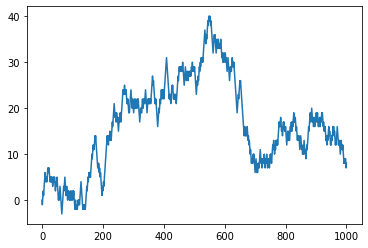

In [106]:
plt.plot(walk)

## Random walker with NumPy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generate a matrix named `steps` that contains 1000 rows where every row is a sample of a 500 random steps (that means that `np.shape` is `(1000, 500)` and `np.unique(steps)` is `[-1, 1]`). Use `np.random.randint` to generate random values.

In [3]:
nrow = 1000
ncol = 500

a = np.random.randint(2, size = nrow*ncol)
a[a == 0] = -1
steps = np.reshape(a, (nrow, ncol))

Generate the `positions` matrix, of shape `(1000, 500)` that contains the position of every step of the walk (hint: `np.cumsum`).

In [4]:
positions = np.cumsum(steps, axis = 1)

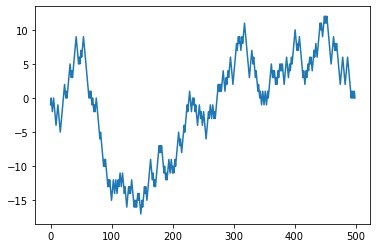

In [5]:
#Ploteamos una de las trayectorias como comprobación
plt.plot(positions[1, :])

Print the longest and shortest positions reached by any of the walks.

In [6]:
print('Maximos:\n', positions.max(axis = 1))
print('Mínimos:\n', positions.min(axis = 1))

Maximos:
 [15 12  4 24 11 59  4 25 20  1  4  4 36 34 18  7 13 14 26 14  1 27  8 20
 -1  7 46  6 29  9 22 10 16 10  3  2  2 23 10 -1 26 28 23 24 33  8 25 22
 19 21 35 46 11 25 25  1 32 28 37  3  5  2 10 28 13 36 39  1 11  2 27 21
 22 16  6 22  8 38 10  9  2 24 32  6 25 32  3 21  4 23 42 25 24 51 12  3
  1 14 25 37 13 66 28  8 11  9 15 34  7 45 20 17 20 43 10 20 36 11 32  6
 42  3 33 10 19 18 49 35 26 42 12 14 19  6  2 21 49  8  7 18 15  8 37 13
 10 51  1  7  4  1  3 16 14 30 18 12 18  5 14 30 26  0  1  3 57 20 27 32
 22 42 33 11 16 38 20  0 30 23  7  5 33 15 27 31  1 30 10 44 37 38  2  7
 46 17  8  7 13 27 12  5 17 13  4  0 23 10 26  8 19 45  4  7  1  3 40 16
 23 42  2  5 30 18 13 47 51 17 18 32 16  3 14 16 52 10  5 13 26 25 13 39
  2 15  1 49 35 14  5 12 31 31  5 22 26  1  6 38  2 33 20  7 18  3  4  6
 13  2  8 30 38  5  1 23 31  2  6  9 26 24 13 36 24  5 32  9 47 17 19 13
  7 14 28 39  6  5  7  6 45 24  5 39 16  7 33 -1 23  2 15  1  9 16  5 11
 19 41 24 11  8  9 26 51 17 18 15  0 17 1

Show the number of walks that reached either 30 steps in any of the directions (hint: `np.abs` and `any`).

In [7]:
mask = np.any(abs(positions) == 30, axis = 1)
n = len(positions[mask])
n

350

For the walkers that reached 30 steps in any of the directions, show the step at which they reached the longest position (hint: `argmax`).

In [8]:
mask = np.any(abs(positions) == 30, axis = 1)
maxPos = np.argmax(abs(positions[mask]), axis = 1)
maxPos

array([426, 477, 282, 253, 347, 495, 300, 475, 461, 389, 351, 304, 452,
       371, 304, 479, 498, 491, 435, 417, 386, 275, 387, 356, 497, 477,
       493, 269, 315, 325, 499, 437, 495, 374, 401, 256, 328, 493, 141,
       452, 478, 418, 499, 341, 411, 495, 490, 164, 497, 485, 392, 168,
       387, 447, 362, 268, 442, 330, 480, 437, 491, 499, 497, 490, 414,
       353, 499, 330, 273, 406, 281, 293, 220, 410, 137, 391, 464, 499,
       497, 480, 411, 499, 474, 266, 182, 418, 381, 359, 475, 328, 369,
       250, 372, 415, 445, 399, 452, 435, 458, 440, 418, 470, 316, 326,
       458, 422, 209, 213, 388, 415, 493, 467, 437, 491, 292, 499, 499,
       333, 133, 388, 244, 413, 457, 476, 340, 488, 350, 496, 499, 498,
       143, 464, 478, 361, 481, 489, 473, 386, 472, 469, 475, 279, 354,
       315, 479, 458, 497, 474, 338, 387, 495, 468, 437, 479, 412, 363,
       344, 290, 453, 314, 255, 424, 270, 497, 468, 455, 343, 499, 397,
       430, 475, 405, 483, 499, 347, 496, 375, 445, 493, 389, 38

## Random Walker with h5py

Now you will generate lots of random walker samples and you will use HDF5 to store them.

1. Create the HDF5 file named `walks.h5`.
2. Create a group named `walks`.
3. Create a dataset named `walks` in the `walks` group. The dataset must use **contiguous** storage (not chunked).
4. You will create 10 million random walk samples of length 500 and type `np.int64` and you will store them in the `walks` dataset.
5. Before starting task 4 and based on the size of the dataset and the size of the dtype, can you calculate an approximation of the resulting file size?
6. While the notebook executes the task of storing the walks in the HDF5 file, open the CPU, RAM and disk monitor of your operative system and take a look to resources being used.
7. Answer again the questions from the previous NumPy exercise but using the 10 million walks you have just generated.

In [9]:
import numpy as np
import h5py
import os
#import matplotlib.pyplot as plt

In [10]:
#1) Creamos el archivo h5py
f = h5py.File("walks.h5", "w")
#2) Creamos el subgrupo
walks = f.create_group("walks")

In [18]:
#3) Creamos el dataset
nrow = 5_000_000 #Reducimos el número de trayectorias a la mitad para reducir el espacio necesario
ncol = 500
dset = walks.create_dataset("walks", (nrow, ncol), dtype = np.int64)

In [19]:
#5) Calculamos el tamaño aprox del archivo
bytes_ntype = 64//8
estSize = bytes_ntype * nrow * ncol / (10**9) #Calculamos el tamaño estimado en GB
print(estSize)

20.0


El tamaño del archivo es de **20** GB, claramente mucho superior que la memoria RAM de cualquier ordenador convencional. Por ello, tendremos que ir añadiendo secuencialmente datos al archivo .h5

In [13]:
#4) Añadimos las trayectorias al archivo .h5
# Despejando de la ecuación anterior, fijando el tamaño por ejemplo a 4GB podemos averiguar cuál será el tamaño de las
# filas que tenemos que ir insertando en el archivo

ramCap = 4  #Capacidad de la RAM (no utilizamos toda para que no muera el ordenador)
nrow = ramCap * 1000*1000*1000 /(bytes_ntype * ncol)
nrow = int(nrow) #Transformamos a int para luego poder dejar los índices del array en función de nrow
for i in range(int(estSize/ramCap)):
    # Creamos el array con las trayectorias
    a = np.random.randint(2, size = nrow*ncol)
    a[a == 0] = -1
    steps = np.reshape(a, (nrow, ncol))
    #Creamos los límites para el dataset
    start = i*nrow
    stop = (i+1)*nrow
    dset[start:stop, :] = np.cumsum(steps, axis = 1)
print(os.stat("walks.h5").st_size / (10**9))

20.000002432


In [15]:
f.close()

7. Answer again the questions from the previous NumPy exercise but using the 10 million walks you have just generated.

In [16]:
f = h5py.File("walks.h5", "r")
walks = f["walks"]
positions = walks["walks"]
positions

<HDF5 dataset "walks": shape (5000000, 500), type "<i8">

Print the longest and shortest positions reached by any of the walks.

In [20]:
bytes_ntype = 64//8
ncol = 500
nrow = 5_000_000

ramCap = 4
estSize = bytes_ntype * nrow * ncol / (10**9)

nrowEst = ramCap * 10**9 / (bytes_ntype * ncol)
nrowEst = int(nrowEst)

In [21]:
for i in range(int(estSize/ramCap)):
    start = i*nrowEst
    stop = (i+1)*nrowEst
    arr = positions[start:stop, :]
    print('Maximos entre %d y %d:\n' % (start,stop), np.amax(arr, axis = 1))
    print('Mínimos entre %d y %d:\n' % (start,stop), np.amin(arr, axis = 1))

Maximos entre 0 y 1000000:
 [22  0  8 ... 25  4 17]
Mínimos entre 0 y 1000000:
 [-13 -29 -18 ... -17 -32  -8]
Maximos entre 1000000 y 2000000:
 [12 26  6 ...  6  8  1]
Mínimos entre 1000000 y 2000000:
 [-44 -14 -37 ... -16 -21 -45]
Maximos entre 2000000 y 3000000:
 [ 3  1 27 ... 17 47  3]
Mínimos entre 2000000 y 3000000:
 [-26 -38  -6 ... -16  -6 -22]
Maximos entre 3000000 y 4000000:
 [13 20  3 ... 15 14 16]
Mínimos entre 3000000 y 4000000:
 [ -9 -11 -39 ... -18 -30 -16]
Maximos entre 4000000 y 5000000:
 [ 5 18 21 ...  7 43 42]
Mínimos entre 4000000 y 5000000:
 [-15  -9  -6 ... -17  -7  -4]


Show the number of walks that reached either 30 steps in any of the directions (hint: `np.abs` and `any`).

In [22]:
n = 0
for i in range(int(estSize/ramCap)):
    start = i*nrowEst
    stop = (i+1)*nrowEst
    arr = positions[start:stop, :]
    mask = np.any(abs(arr) == 30, axis = 1)
    n = n + sum(mask)
n

1801102

For the walkers that reached 30 steps in any of the directions, show the step at which they reached the longest position (hint: `argmax`).

In [23]:
for i in range(int(estSize/ramCap)):
    start = i*nrowEst
    stop = (i+1)*nrowEst
    arr = positions[start:stop, :]
    mask = np.any(abs(arr) == 30, axis = 1)
    maxPos = np.argmax(abs(arr[mask]), axis = 1)
    print('Posiciones donde se alcanza el máximo, entre las trayectorias %d y %d:\n' % (start,stop),
          maxPos)

Posiciones donde se alcanza el máximo, entre las trayectorias 0 y 1000000:
 [493 451 498 ... 385 442 289]
Posiciones donde se alcanza el máximo, entre las trayectorias 1000000 y 2000000:
 [473 496 145 ... 425 455 440]
Posiciones donde se alcanza el máximo, entre las trayectorias 2000000 y 3000000:
 [485 361 296 ... 371 499 404]
Posiciones donde se alcanza el máximo, entre las trayectorias 3000000 y 4000000:
 [480 410 493 ... 333 448 245]
Posiciones donde se alcanza el máximo, entre las trayectorias 4000000 y 5000000:
 [318 483 416 ... 414 456 445]


In [100]:
f.close()